In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
url = "https://raw.githubusercontent.com/DrSaadLa/MLLabs/main/data/housing.csv"
df = pd.read_csv(url)

In [4]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [5]:
df.shape

(5000, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Thenks God, There are no missing values

In [7]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


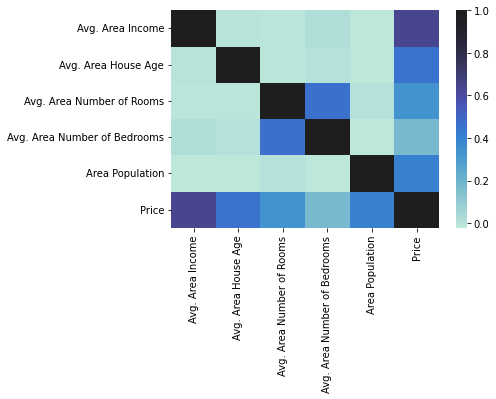

In [8]:
plt.figure()
sns.heatmap(df.corr(), center = True)
plt.show()

In [9]:
# Here I dropped The Address Column because it's a categorical and There are no useful information from it at this point
X = df.drop(['Price', 'Address'], axis = 1)
y = df['Price']

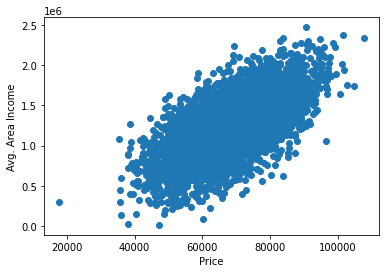

In [10]:
# Plot the relationship between Avg. Area Income and Price
plt.figure()
plt.scatter(x = X['Avg. Area Income'], y = y)
plt.xlabel('Price')
plt.ylabel('Avg. Area Income')
plt.show()

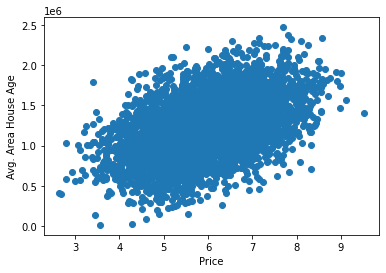

In [11]:
# Plot the relationship between Avg. Area House Age and Price
plt.figure()
plt.scatter(x = X['Avg. Area House Age'], y = y)
plt.xlabel('Price')
plt.ylabel('Avg. Area House Age')
plt.show()

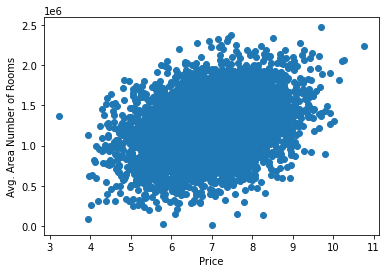

In [12]:
# Plot the relationship between Avg. Area Number of Rooms and Price
plt.figure()
plt.scatter(x = X['Avg. Area Number of Rooms'], y = y)
plt.xlabel('Price')
plt.ylabel('Avg. Area Number of Rooms')
plt.show()

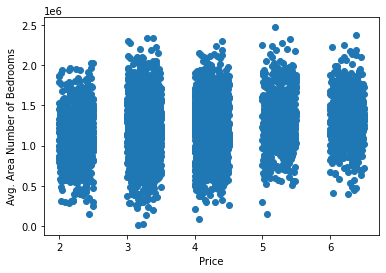

In [13]:
# Plot the relationship between Avg. Area Number of Bedrooms and Price
plt.figure()
plt.scatter(x = X['Avg. Area Number of Bedrooms'], y = y)
plt.xlabel('Price')
plt.ylabel('Avg. Area Number of Bedrooms')
plt.show()

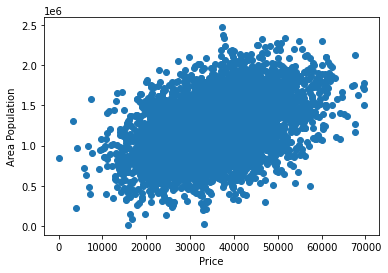

In [14]:
# Plot the relationship between Area Population and Price
plt.figure()
plt.scatter(x = X['Area Population'], y = y)
plt.xlabel('Price')
plt.ylabel('Area Population')
plt.show()

In [15]:
lm = LinearRegression()
cv_scores = cross_val_score(lm, X, y, cv = 15)

In [16]:
cv_scores

array([0.91874514, 0.911599  , 0.91943151, 0.9181247 , 0.91746881,
       0.9243591 , 0.92055063, 0.91110604, 0.91278469, 0.91825917,
       0.92588263, 0.91843716, 0.91422602, 0.91204439, 0.91533229])

In [17]:
score = np.mean(cv_scores)

In [18]:
score

0.9172234190966702

# So the accuracy of the model is 91.7%

In [19]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [20]:
mae = make_scorer(mean_absolute_error)
mse = make_scorer(mean_squared_error)

In [21]:
cv_scr_mae = cross_val_score(lm, X, y, cv = 10, scoring = mae)
mae_scr = np.mean(cv_scr_mae)

In [22]:
mae_scr

81427.89617840562

In [23]:
cv_scr_mse = cross_val_score(lm, X, y, cv = 10, scoring = mse)
mse = np.mean(cv_scr_mse)
root_mse = np.sqrt(mse)

In [24]:
root_mse

101201.50070293322